In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
folder_path = '/content/drive/MyDrive/uk_ev/'

In [4]:
data = pd.read_excel('/content/drive/MyDrive/uk_ev/uk_ev_registrations_2010-2025.xlsx')

In [5]:
data.head()

,monthOfFirstRegistration,make,vehicleType,fuelType,registrations
0,2010-01-01,CITROEN,Car,BEV,1
1,2010-02-01,CITROEN,Car,BEV,1
2,2010-03-01,MERCEDES-BENZ,Car,BEV,1
3,2010-03-01,HONDA,Car,BEV,1
4,2010-03-01,CITROEN,Car,BEV,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   monthOfFirstRegistration  4188 non-null   object
 1   make                      4188 non-null   object
 2   vehicleType               4188 non-null   object
 3   fuelType                  4188 non-null   object
 4   registrations             4188 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 163.7+ KB


In [7]:
data.describe()

,registrations
count,4188.000000
mean,363.906399
std,827.309403
min,1.000000
25%,8.000000
50%,74.000000
75%,363.000000
max,16772.000000


In [8]:
# Convert the date column to real datetime
data['monthOfFirstRegistration'] = pd.to_datetime(data['monthOfFirstRegistration'])

# Clean up text columns (remove spaces, fix casing)
data['make'] = data['make'].str.strip().str.upper()
data['vehicleType'] = data['vehicleType'].str.strip().str.upper()
data['fuelType'] = data['fuelType'].str.strip().str.upper()

In [17]:
data.head()

,monthOfFirstRegistration,make,vehicleType,fuelType,registrations,year,month,quarter,day_of_week,cumulative_registrations,total_by_brand,market_share,rolling_avg_3
0,2010-01-01,45,0,0,1,2010,1,1,4,1,17673,0.164706,1.000000
1,2010-02-01,45,0,0,1,2010,2,1,0,2,17673,0.164706,1.000000
2,2010-03-01,110,0,0,1,2010,3,1,0,1,86851,0.011765,1.000000
3,2010-03-01,89,0,0,1,2010,3,1,0,1,7995,0.011765,1.000000
4,2010-03-01,45,0,0,5,2010,3,1,0,7,17673,0.164706,2.333333


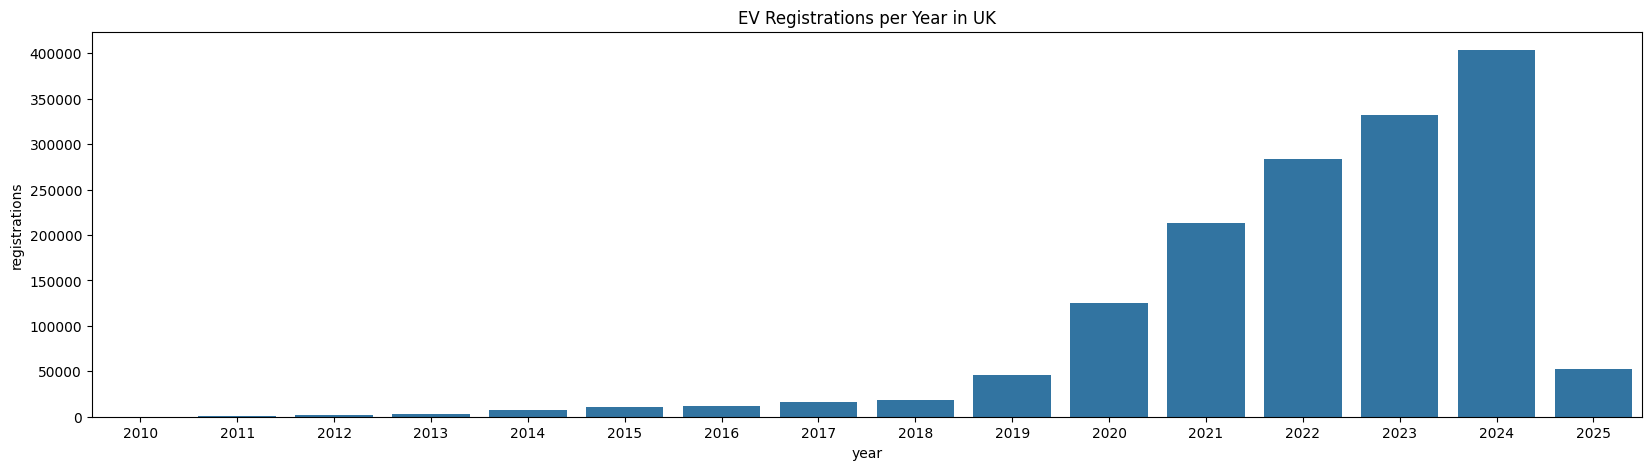

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total EVs per year
yearly = data.groupby('year')['registrations'].sum().reset_index()

plt.figure(figsize=(20,5))
sns.barplot(data=yearly, x='year', y='registrations')
plt.title("EV Registrations per Year in UK")
plt.show()


/tmp/ipython-input-11-2546176755.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


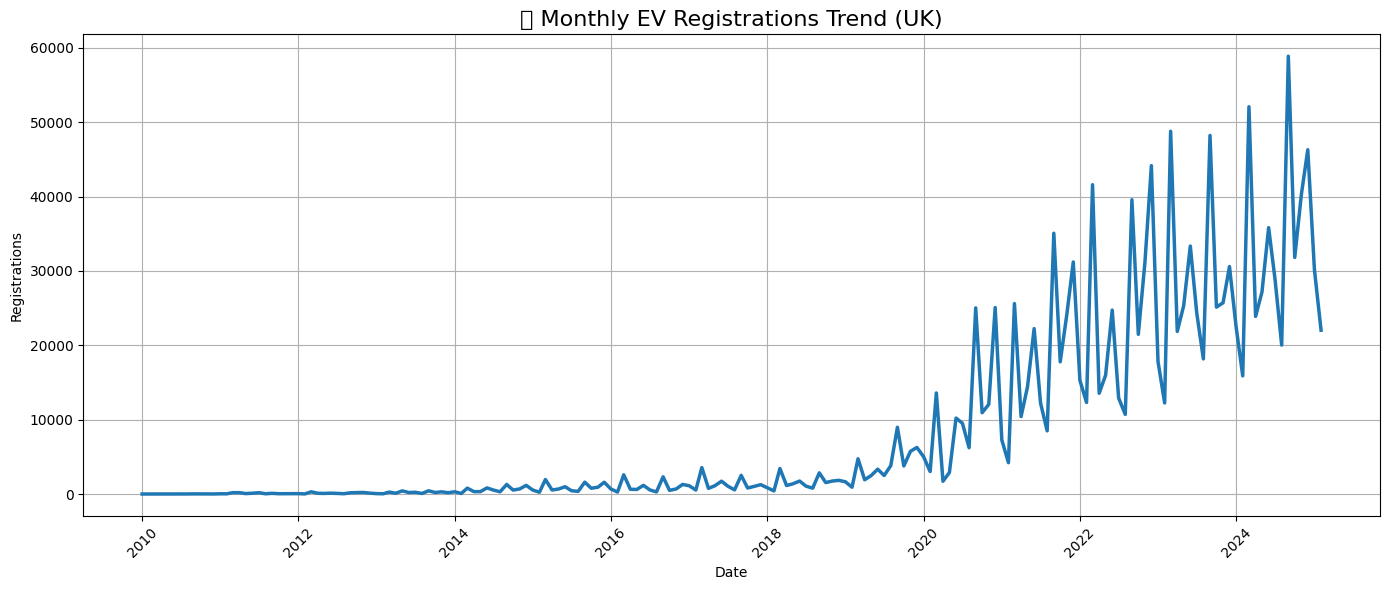

/tmp/ipython-input-11-2546176755.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, y='make', x='registrations', palette='viridis')
/tmp/ipython-input-11-2546176755.py:21: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


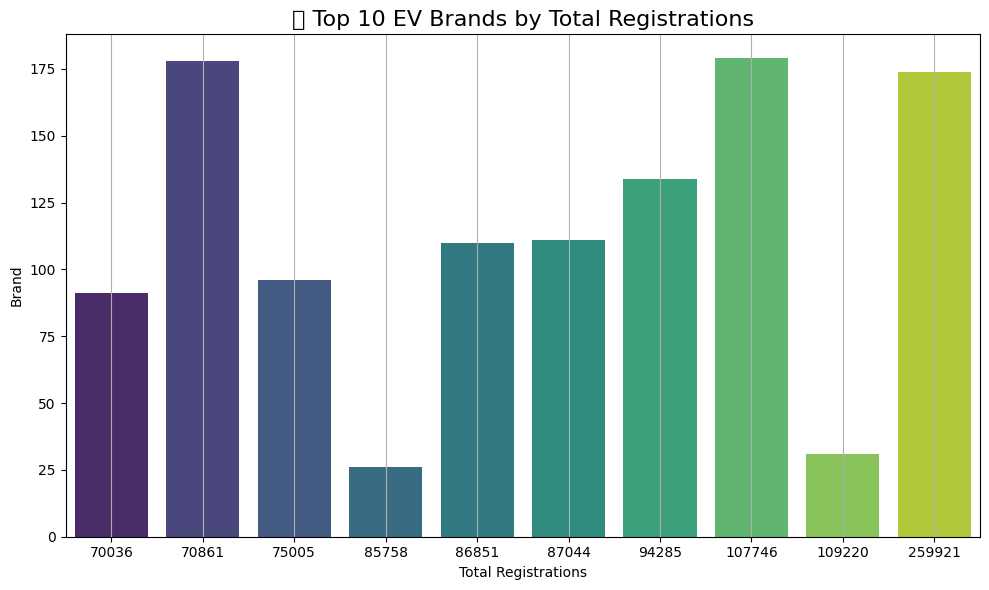

/tmp/ipython-input-11-2546176755.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='vehicleType', palette='Set2')
/tmp/ipython-input-11-2546176755.py:30: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


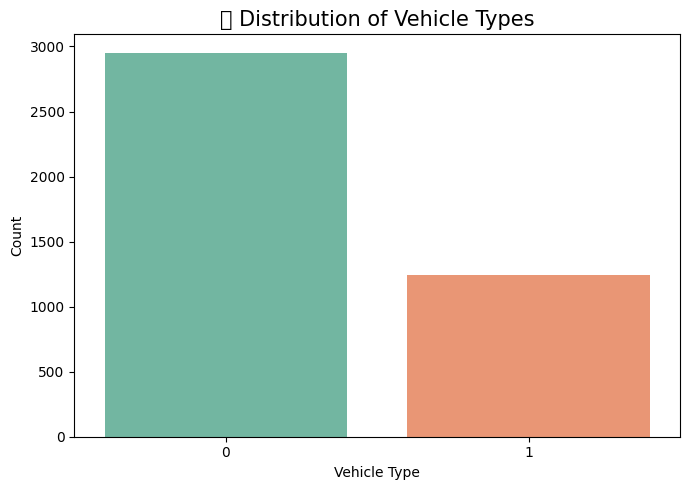

/tmp/ipython-input-11-2546176755.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='fuelType', palette='Set1')


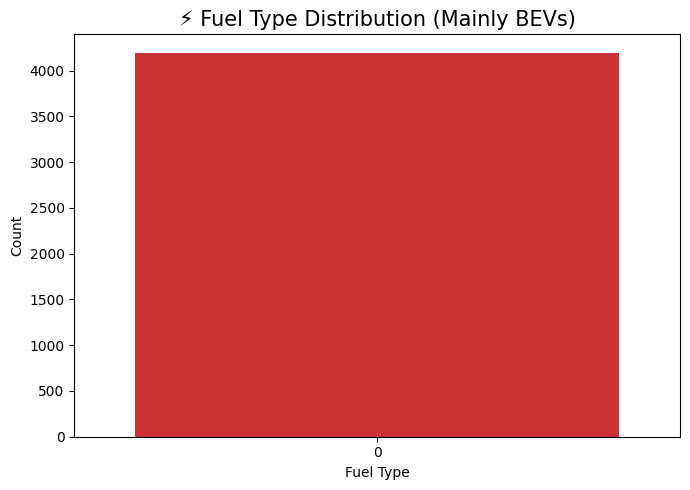

/tmp/ipython-input-11-2546176755.py:49: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


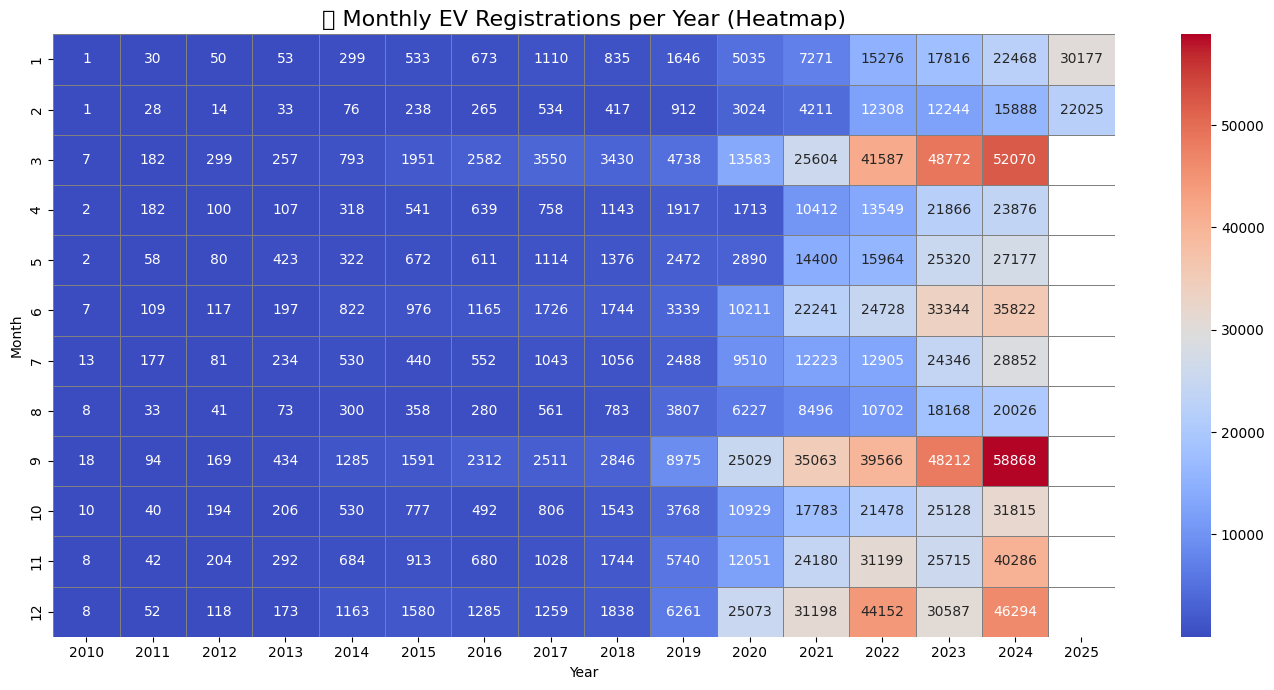

In [11]:
# 1. Monthly EV Registrations Trend
plt.figure(figsize=(14, 6))
monthly = data.groupby('monthOfFirstRegistration')['registrations'].sum().reset_index()
sns.lineplot(data=monthly, x='monthOfFirstRegistration', y='registrations', linewidth=2.5)
plt.title('📈 Monthly EV Registrations Trend (UK)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 EV Brands
plt.figure(figsize=(10, 6))
top_brands = data.groupby('make')['registrations'].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_brands, y='make', x='registrations', palette='viridis')
plt.title('🏆 Top 10 EV Brands by Total Registrations', fontsize=16)
plt.xlabel('Total Registrations')
plt.ylabel('Brand')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 3. Vehicle Type Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='vehicleType', palette='Set2')
plt.title('🚗 Distribution of Vehicle Types', fontsize=15)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 4. Fuel Type Distribution
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='fuelType', palette='Set1')
plt.title('⚡ Fuel Type Distribution (Mainly BEVs)', fontsize=15)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Heatmap of Monthly EV Registrations per Year
pivot = data.pivot_table(index='month', columns='year', values='registrations', aggfunc='sum')
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5, linecolor='grey')
plt.title('🔥 Monthly EV Registrations per Year (Heatmap)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

# 1. Extract parts from date
data['year'] = data['monthOfFirstRegistration'].dt.year
data['month'] = data['monthOfFirstRegistration'].dt.month
data['quarter'] = data['monthOfFirstRegistration'].dt.quarter
data['day_of_week'] = data['monthOfFirstRegistration'].dt.dayofweek  # 0 = Monday

# 2. Cumulative total per brand
data['cumulative_registrations'] = data.groupby('make')['registrations'].cumsum()

# 3. Total registrations per brand
data['total_by_brand'] = data.groupby('make')['registrations'].transform('sum')

# 4. Market share per brand per year
data['market_share'] = data.groupby(['year', 'make'])['registrations'].transform('sum') / data.groupby('year')['registrations'].transform('sum')

# 5. Rolling average over 3 months
data['rolling_avg_3'] = data.groupby('make')['registrations'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 6. Convert categorical object columns into numerical values (Label Encoding)
label_cols = ['make', 'vehicleType', 'fuelType']
for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Converting any NaN values to 0
data.fillna(0, inplace=True)
data.head(10)


,monthOfFirstRegistration,make,vehicleType,fuelType,registrations,year,month,quarter,day_of_week,cumulative_registrations,total_by_brand,market_share,rolling_avg_3
0,2010-01-01,45,0,0,1,2010,1,1,4,1,17673,0.164706,1.000000
1,2010-02-01,45,0,0,1,2010,2,1,0,2,17673,0.164706,1.000000
2,2010-03-01,110,0,0,1,2010,3,1,0,1,86851,0.011765,1.000000
3,2010-03-01,89,0,0,1,2010,3,1,0,1,7995,0.011765,1.000000
4,2010-03-01,45,0,0,5,2010,3,1,0,7,17673,0.164706,2.333333
5,2010-04-01,177,0,0,1,2010,4,2,3,1,14568,0.023529,1.000000
6,2010-04-01,45,0,0,1,2010,4,2,3,8,17673,0.164706,2.333333
7,2010-05-01,139,0,0,1,2010,5,2,5,1,60117,0.094118,1.000000
8,2010-05-01,45,0,0,1,2010,5,2,5,9,17673,0.164706,2.333333
9,2010-06-01,174,0,0,1,2010,6,2,1,1,259921,0.117647,1.000000


In [12]:
data.to_csv('/content/drive/MyDrive/uk_ev/ev_dataset_ready.csv', index=False)


In [13]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   monthOfFirstRegistration  4188 non-null   datetime64[ns]
 1   make                      4188 non-null   int64         
 2   vehicleType               4188 non-null   int64         
 3   fuelType                  4188 non-null   int64         
 4   registrations             4188 non-null   int64         
 5   year                      4188 non-null   int32         
 6   month                     4188 non-null   int32         
 7   quarter                   4188 non-null   int32         
 8   day_of_week               4188 non-null   int32         
 9   cumulative_registrations  4188 non-null   int64         
 10  total_by_brand            4188 non-null   int64         
 11  market_share              4188 non-null   float64       
 12  rolling_avg_3       

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Step 1: Select features and target
features = ['year', 'month', 'quarter', 'day_of_week', 'total_by_brand', 'market_share']
X = data[features]
y = data['registrations']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)


In [21]:
# Step 4: Evaluation function
def evaluate(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE  : {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}")

# Step 5: Compare models
evaluate("Linear Regression", y_test, lr_preds)
evaluate("Random Forest", y_test, rf_preds)
evaluate("XGBoost", y_test, xgb_preds)


Linear Regression Evaluation:
MAE  : 382.91
MSE  : 354507.20
RMSE : 595.41
R²   : 0.2233

Random Forest Evaluation:
MAE  : 223.90
MSE  : 251657.74
RMSE : 501.65
R²   : 0.4486

XGBoost Evaluation:
MAE  : 205.40
MSE  : 190305.41
RMSE : 436.24
R²   : 0.5831


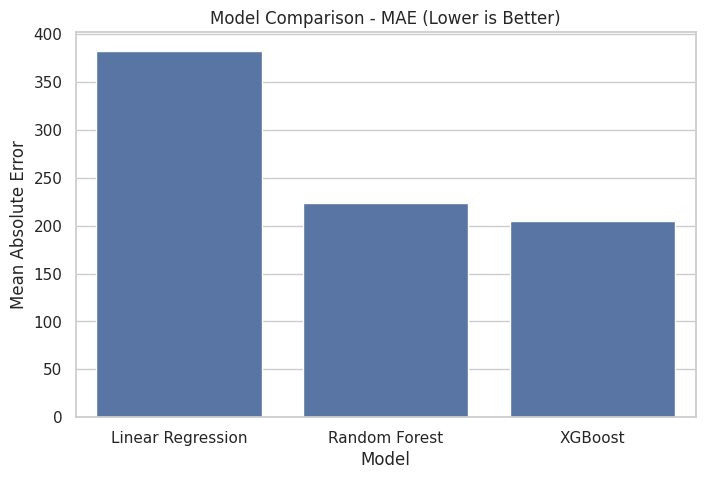

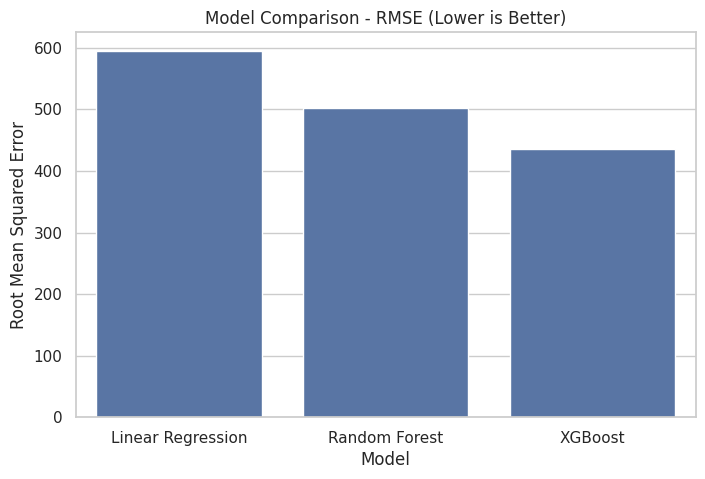

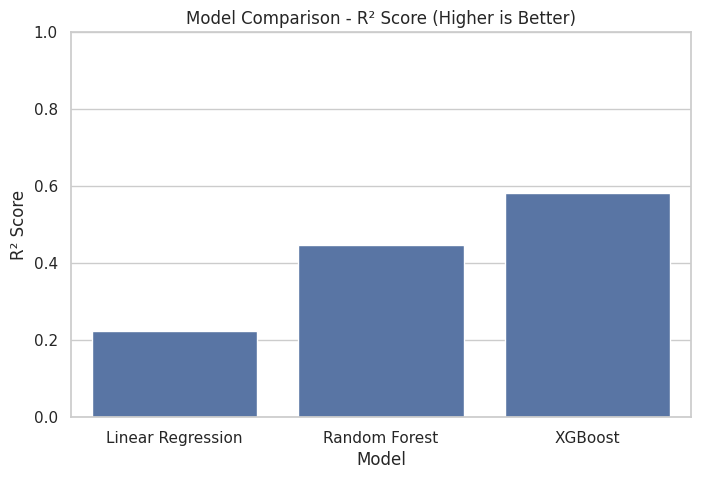

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create DataFrame with your actual model results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [382.91, 223.90, 205.40],
    'RMSE': [595.41, 501.65, 436.24],
    'R2': [0.2233, 0.4486, 0.5831]
})

# Step 2: Set Seaborn style
sns.set(style="whitegrid")

# Step 3: Plot MAE
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Model Comparison - MAE (Lower is Better)')
plt.ylabel('Mean Absolute Error')
plt.show()

# Step 4: Plot RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Model Comparison - RMSE (Lower is Better)')
plt.ylabel('Root Mean Squared Error')
plt.show()

# Step 5: Plot R² Score
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Comparison - R² Score (Higher is Better)')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.show()
